In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.gaussian_process import GaussianProcess
%matplotlib inline

###Введение

In [2]:
def Beale(x):
    x1 = x[0]
    x2 = x[1]
    return (1.5-x1+x1*x2) ** 2 + (2.25-x1+x1*x2*x2) ** 2 + (2.625-x1+x1*x2*x2*x2) ** 2

In [3]:
p = 500
X = np.zeros((p,p))
Y = np.zeros((p,p))
Z = np.zeros((p,p))
for i in xrange(p):
    X[i]   = -4.5 + i * 9. / p
    Y[:,i] = -4.5 + i * 9. / p
for i in xrange(p):
    for j in xrange(p):
        Z[i,j] = Beale([X[i,j], Y[i,j]])

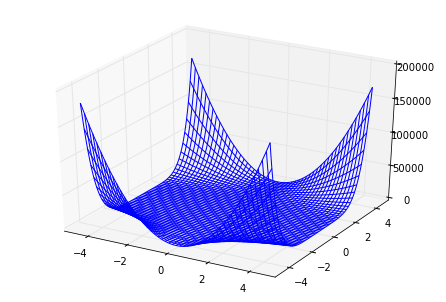

In [4]:
ax = Axes3D(plt.gcf())
ax.plot_wireframe(X, Y, Z, cstride=10, rstride=10)

###Оценка ошибок

In [5]:
def E(true_values, experimental_values):
    return np.sum((true_values - experimental_values) ** 2)

In [6]:
z_true = np.zeros((p*p,))

In [7]:
for i in xrange(p):
    for j in xrange(p):
        z_true[i * p + j] = Z[i,j]

In [8]:
def gridShow(z_pred):
    Z = np.zeros((p,p))
    for i in xrange(p):
        for j in xrange(p):
            Z[i,j] = z_pred[i * p + j]
    ax = Axes3D(plt.gcf())
    ax.plot_wireframe(X, Y, Z, cstride=10, rstride=10)

###Тестовый запуск

In [14]:
ns = range(10,201,5)

In [15]:
N = 50

In [16]:
points = np.zeros((p*p,2))
for i in xrange(p):
    for j in xrange(p):
        points[i * p + j][0] = X[i,j]
        points[i * p + j][1] = Y[i,j]

In [17]:
point_ind = range(p*p)

In [18]:
x = points[np.random.choice(point_ind, size=10)]
y = np.zeros((x.shape[0],))
for i in xrange(x.shape[0]):
    y[i] = Beale(x[i])

In [19]:
gp = GaussianProcess()

In [20]:
gp.fit(x,y)

GaussianProcess(beta0=None, corr=<function squared_exponential at 0x39c3cf8>,
        normalize=True, nugget=array(2.220446049250313e-15),
        optimizer='fmin_cobyla', random_start=1,
        random_state=<mtrand.RandomState object at 0x1bedfd0>,
        regr=<function constant at 0x39c3938>, storage_mode='full',
        theta0=array([[ 0.1]]), thetaL=None, thetaU=None, verbose=False)

In [21]:
z_pred = gp.predict(points)

In [22]:
E(z_pred, z_true)

100764151097152.45

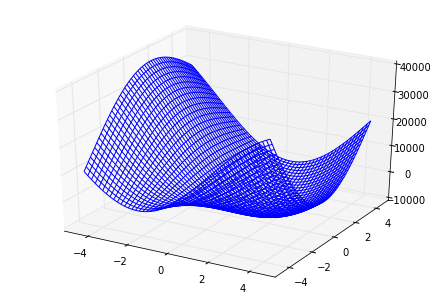

In [23]:
gridShow(z_pred)

###Эксперименты

In [24]:
points = np.zeros((p*p,2))
for i in xrange(p):
    for j in xrange(p):
        points[i * p + j][0] = X[i,j]
        points[i * p + j][1] = Y[i,j]
point_ind = range(p*p)
values = np.zeros((p*p,))
for i in xrange(p*p):
    values[i] = Beale(points[i])

<p>В sklearn есть проблема с реализацией гауссовских процессов:https://github.com/scikit-learn/scikit-learn/issues/642</p>
<p>В качестве обходного решения придется сделать, чтобы все значения функции при обучении были все различны.</p>

####Равномерная случайная генерация

In [25]:
errs_uniform = np.zeros((N, len(ns)))
thetime = time()
for step in xrange(N):
    nnum = 0
    for n in ns:
        ind = np.random.choice(point_ind, size=n)
        x = points[ind]
        y = values[ind]
        for t in xrange(10):
            if np.unique(y).shape == y.shape:
                break
            else:
                ind = np.random.choice(point_ind, size=n)
                x = points[ind]
                y = values[ind]
        if np.unique(y).shape != y.shape:
            continue
        gp = GaussianProcess()
        gp.fit(x,y)
        z_pred = gp.predict(points)
        errs_uniform[step, nnum]  = E(z_pred, z_true)
        nnum += 1
print time() - thetime

10 13.4978950024
20 48.6263170242
30 116.22228694
371.791524887


(0, 2000000000)

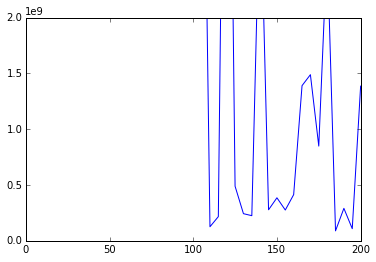

In [33]:
plt.plot(ns, np.mean(errs_uniform, axis=1))
plt.ylim([0, 2 * 10 ** 9])

####Оптимизированные латинские гиперкубы

In [ ]:
errs_uniform = np.zeros((N, len(ns)))
thetime = time()
for step in xrange(N):
    nnum = 0
    for n in ns:
        ind = np.random.choice(point_ind, size=n)
        x = points[ind]
        y = values[ind]
        for t in xrange(10):
            if np.unique(y).shape == y.shape:
                break
            else:
                ind = np.random.choice(point_ind, size=n)
                x = points[ind]
                y = values[ind]
        if np.unique(y).shape != y.shape:
            continue
        gp = GaussianProcess()
        gp.fit(x,y)
        z_pred = gp.predict(points)
        errs_uniform[step, nnum]  = E(z_pred, z_true)
        nnum += 1
print time() - thetime